In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
movies = pd.read_csv('tmdb_movies.csv')
genres = pd.read_csv('tmdb_genres.csv')

In [38]:
Q3_vote_count = movies['vote_count'].quantile(0.75)
top_rated_movies = movies[movies['vote_count'] > Q3_vote_count].sort_values(by='vote_average', ascending=False).head(10)
print(top_rated_movies[['title', 'vote_average', 'vote_count']])

                                title  vote_average  vote_count
1881         The Shawshank Redemption           8.5        8205
3337                    The Godfather           8.4        5893
2731           The Godfather: Part II           8.3        3338
3232                     Pulp Fiction           8.3        8428
3865                         Whiplash           8.3        4254
1818                 Schindler's List           8.3        4329
662                        Fight Club           8.3        9413
2294                    Spirited Away           8.3        3840
2170                           Psycho           8.2        2320
3719  One Flew Over the Cuckoo's Nest           8.2        2919


In [39]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [40]:
movies_2010_2016 = movies[(movies['release_date'] >= '2010-01-01') & (movies['release_date'] <= '2016-12-31')]
revenue_budget_by_year = movies_2010_2016.groupby(movies_2010_2016['release_date'].dt.year).agg({'revenue': 'mean', 'budget': 'mean'})

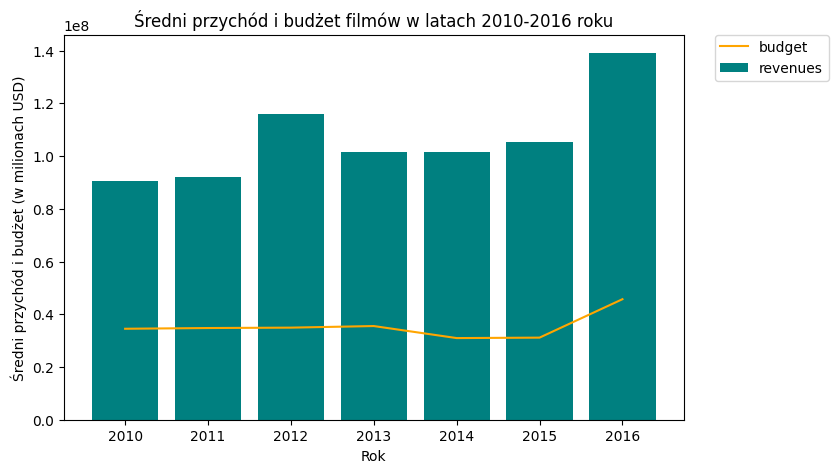

In [41]:
plt.figure(figsize=(8, 5))
plt.bar(revenue_budget_by_year.index, revenue_budget_by_year['revenue'], label='revenues', color='teal')
plt.plot(revenue_budget_by_year.index, revenue_budget_by_year['budget'], label='budget', color='orange')
plt.xlabel('Rok')
plt.ylabel('Średni przychód i budżet (w milionach USD)')
plt.title('Średni przychód i budżet filmów w latach 2010-2016 roku')
plt.xticks(revenue_budget_by_year.index)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [42]:
movies = pd.merge(movies, genres, left_on='genre_id', right_on=genres.columns[0], how='left')

In [43]:
print(movies[['title', 'genres']].head())

                                      title     genres
0                                    Avatar     Action
1  Pirates of the Caribbean: At World's End  Adventure
2                                   Spectre     Action
3                     The Dark Knight Rises     Action
4                               John Carter     Action


In [44]:
most_common_genre = movies['genres'].value_counts().idxmax()
most_common_genre_count = movies['genres'].value_counts().max()
print(f"Najczęściej występujący gatunek filmu: {most_common_genre} ({most_common_genre_count} filmów)")

Najczęściej występujący gatunek filmu: Drama (1207 filmów)


In [45]:
average_runtime_by_genre = movies.groupby('genres')['runtime'].mean()
longest_genre = average_runtime_by_genre.idxmax()
longest_genre_runtime = average_runtime_by_genre.max()
print(f"Gatunek filmu o największym średnim czasie trwania: {longest_genre} ({longest_genre_runtime} minut)")

Gatunek filmu o największym średnim czasie trwania: History (133.96 minut)


In [46]:
longest_genre_movies = movies[movies['genres'] == longest_genre]
longest_genre_movies = longest_genre_movies.sort_values(by="runtime", ascending=False)

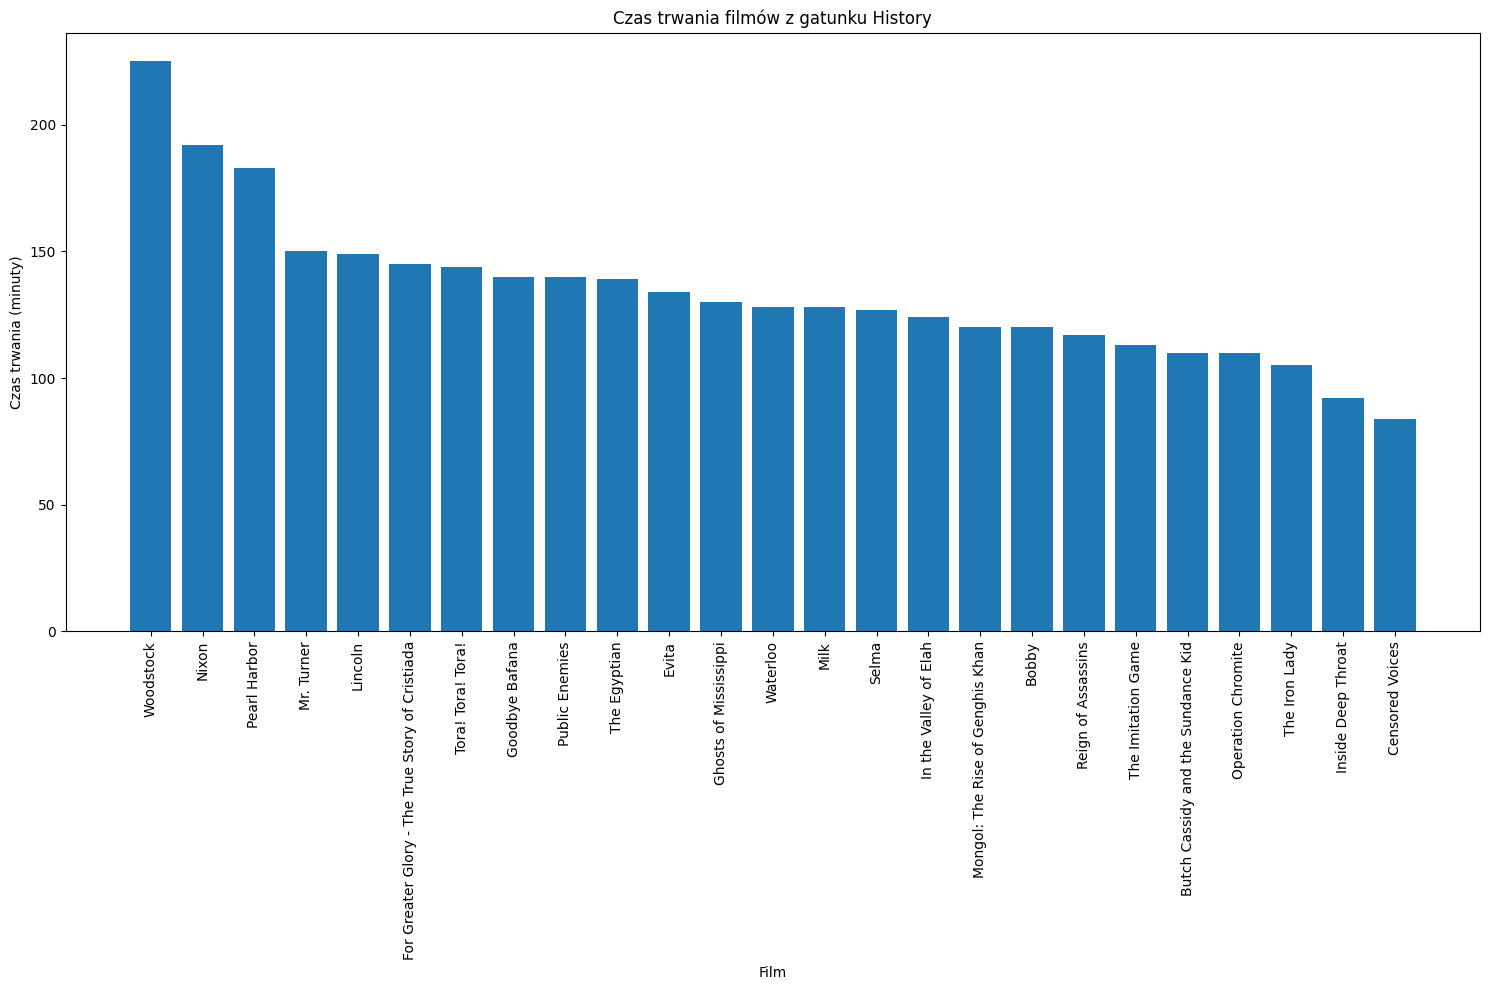

In [48]:
plt.figure(figsize=(15, 10))
plt.bar(longest_genre_movies["title"], longest_genre_movies["runtime"])
plt.xlabel("Film")
plt.ylabel("Czas trwania (minuty)")
plt.title(f"Czas trwania filmów z gatunku {longest_genre}")
plt.xticks(rotation=90)
plt.tight_layout()